# Strategy Optimization<hr>
- How to know what the lookback period should be for your strategy?<br>

We optimize using pythong function by trying a range of inputs

In [1]:
import bt
import yfinance as yf
import matplotlib.pyplot as plt
import talib

In [2]:
# Lets define a python function to reuse while parameterizing the variables for strategy
import numpy as np
def signal_strategy(ticker, period, name, start='2020-01-01', end='2020-12-30'):
    # Get price data and calculate SMA
    data = bt.get(ticker, start=start, end=end)
    sma = data.rolling(period).mean()

    # Create a signal based on the SMA
    bt_strategy = bt.Strategy(name,
        [bt.algos.SelectWhere(data > sma),
         bt.algos.WeighEqually(),
         bt.algos.Rebalance()])

    return bt.Backtest(bt_strategy, data)

In [8]:
# Let's define multiple backtests and compare

ticker = 'aapl'

sma_10 = signal_strategy(
    ticker=ticker, 
    period=10,
    name='SMA_10'
)

sma_30 = signal_strategy(
    ticker=ticker, 
    period=30,
    name='SMA_30'
)

sma_100 = signal_strategy(
    ticker=ticker, 
    period=100,
    name='SMA_100'
)

100%|██████████| 3/3 [00:00<00:00, 77195.78it/s]


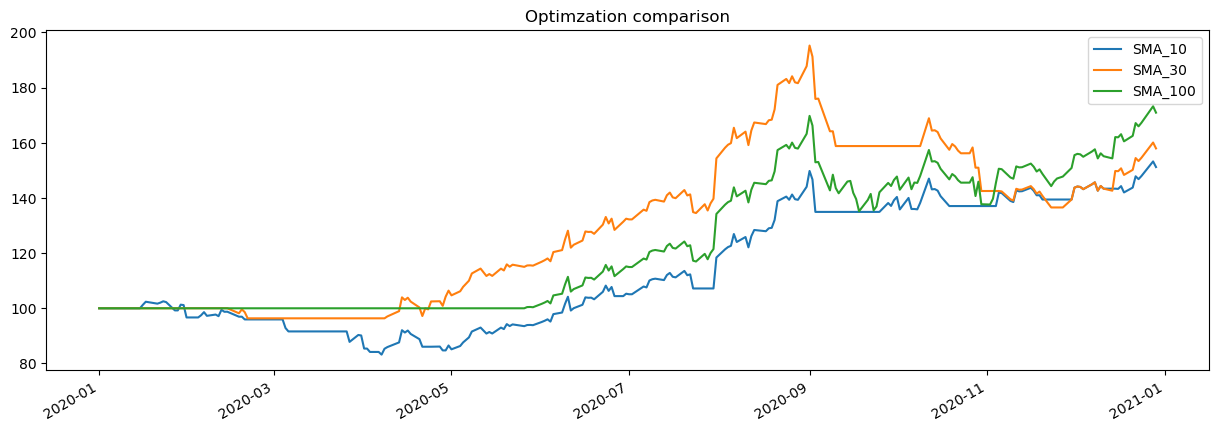

In [11]:
# Lets run and get the results
bt_resutls = bt.run(sma_10, sma_30, sma_100)
bt_resutls.plot(title="Optimzation comparison")
plt.show()

## Benchmarking <hr>
- A standard or point of reference against which a strategy is measured or assesed<br>

Simply put, what if instead of actively trading stocks, we just bought and held the stock?

In [13]:
def buy_and_hold(ticker, name, start='2020-01-01', end='2020-12-30'):
    data = bt.get(ticker, start=start, end=end)
    bt_strategy = bt.Strategy(name,
                               [bt.algos.RunOnce(),
                                bt.algos.SelectAll(),
                                bt.algos.WeighEqually(),
                                bt.algos.Rebalance()])
    return bt.Backtest(bt_strategy, data)

100%|██████████| 4/4 [00:00<00:00, 56.65it/s]


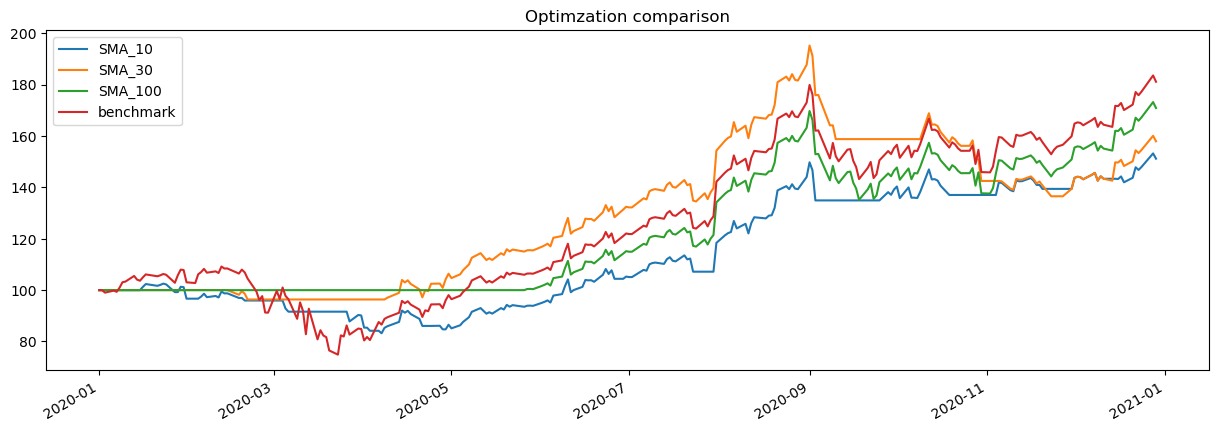

In [14]:
benchmark = buy_and_hold(
    ticker=ticker,
    name='benchmark'
)
# Lets run and get the results
bt_resutls = bt.run(sma_10, sma_30, sma_100, benchmark)
bt_resutls.plot(title="Optimzation comparison")
plt.show()